*Collaborated with student Sophie Guo, Yitong Zhao, and Fanxi Chen*

## Section 1: Multiple Regression

### 1) Answer the following
**a) What is the outcome?**  
*The outcome is "Sales", or the number of packs of cigarettes sold in a state per person.*<br>

**b) What are the predictors they want to understand the impact of?**<br>
*The rest of variables in the table will be the predictors the organization want to understand the impact of. These include:*
+ *[Age] median age*
+ *[HS] percentage high school education completion*
+ *[Income] Per capita personal income for a state in dollars*
+ *[Black] percentage black race*
+ *[Female] percentage females*
+ *[Price] average price of cigarettes (cents)*

**c) What is the hypothesis?**<br>
*The hypothesis is that the predictors listed above are related to cigarette sales.*  
*Alternatively, it could be that one or more of the predictors can predict cigarette sales.*  
*The null hypothesis would say none of the predictors listed can predict cigarette sales.*

### 2) Exploratory data analysis
**a) Look at a few rows of the data to understand it**

In [1]:
import pandas as pd
cig = pd.read_csv("../W5/cigarette_sales.csv", dtype = "float64") # change all data type from string to float
cig.head()

,Age,HS,Income,Black,Female,Price,Sales
0,27.0,41.3,2948.0,26.2,51.7,42.7,89.8
1,22.9,66.7,4644.0,3.0,45.7,41.8,121.3
2,26.3,58.1,3665.0,3.0,50.8,38.5,115.2
3,29.1,39.9,2878.0,18.3,51.5,38.8,100.3
4,28.1,62.6,4493.0,7.0,50.8,39.7,123.0


In [2]:
cig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     51 non-null     float64
 1   HS      51 non-null     float64
 2   Income  51 non-null     float64
 3   Black   51 non-null     float64
 4   Female  51 non-null     float64
 5   Price   51 non-null     float64
 6   Sales   51 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


**b) Generate some summary statistics**

In [3]:
# central tendency, dispersion
cig.describe()

,Age,HS,Income,Black,Female,Price,Sales
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,27.466667,53.149020,3763.705882,9.992157,50.950980,38.074510,121.541176
std,1.876983,8.001184,594.715639,12.648318,1.111463,4.128576,32.070374
min,22.900000,37.800000,2626.000000,0.200000,45.700000,29.000000,65.500000
25%,26.400000,48.300000,3271.000000,1.600000,50.750000,34.700000,105.350000
50%,27.400000,53.300000,3751.000000,6.000000,51.100000,38.900000,119.000000
75%,28.750000,59.100000,4116.500000,13.550000,51.500000,41.350000,124.550000
max,32.300000,67.300000,5079.000000,71.100000,53.500000,45.500000,265.700000


In [4]:
# central tendency
cig.median()

Age         27.4
HS          53.3
Income    3751.0
Black        6.0
Female      51.1
Price       38.9
Sales      119.0
dtype: float64

In [5]:
# dispersion
cig.var()

Age            3.523067
HS            64.018949
Income    353686.691765
Black        159.979937
Female         1.235349
Price         17.045137
Sales       1028.508871
dtype: float64

**c) Look at the distributions and scatterplots of the data.**

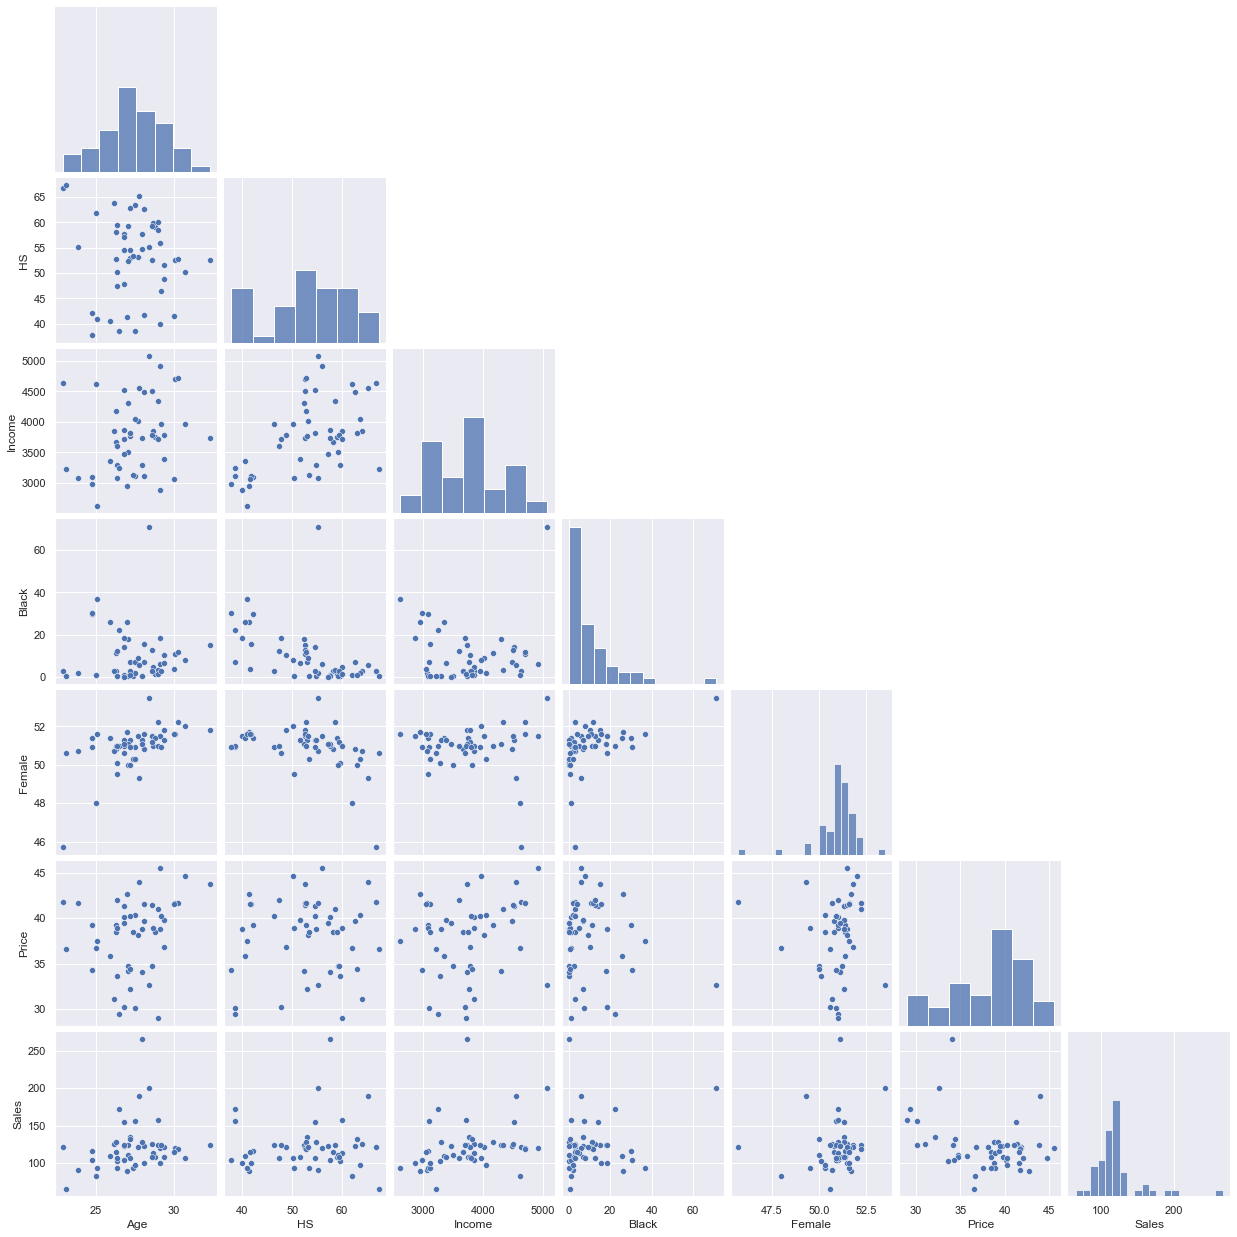

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.pairplot(cig, corner = True) # corner keeps only the half of the repeated graphs

**d) Do any of these variables look like they might violate regression assumptions? Which ones and which assumptions?**

*Assumptions:*  
**Linear relationship between predictors and outcome**  
*It does not look like variable Black has a linear relationship with the outcome variable Sales. As Black increases, Sales basically remains the same.*  
**No or little multicollinearity between independe variables (should not be correlated)**  
*HS and income seem to have relatively high correlation (0.53 from previous correlation matrix).*  
**Residuals are approximately normal**  
*The variable Black is not normally distributed (left half of the bell missing). Other predictors are roughly normally distributed.*  
**Independence: Observations are independent of each other**  
*Cannot be detected simply looking at these graphs.*  
**Variables measured without error**  
*Cannot be detected simply looking at these graphs.*

**e) Are their outliers in the outcome?**  

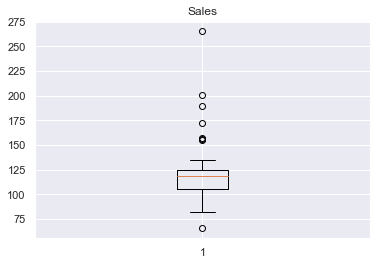

In [7]:
plt.boxplot(cig["Sales"])
plt.title(label = "Sales")
plt.show()

*It looks like there are some outliers. It is reflected by the bar that is far from the majority in the histogram, as well as those points higher than the rest in the scatterplot. In the boxplot above, it can also be reflected by the several points that go beyond the top and bottom whiskers.*

### 3) Multiple regression

**a) Conduct a multiple regression analysis**

In [8]:
import statsmodels.api as sm

y = cig["Sales"]
x = cig[["Age", "HS", "Income", "Black", "Female", "Price"]]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.464
Date:                Wed, 28 Sep 2022   Prob (F-statistic):            0.00686
Time:                        22:03:08   Log-Likelihood:                -238.86
No. Observations:                  51   AIC:                             491.7
Df Residuals:                      44   BIC:                             505.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.3448    245.607      0.421      0.6

**b) Are any of the variables significant? Explain.**  
*The variable Price is significant in predicting Sales. It has a p-value of 0.003 in the model, which is lower than the empirical threshold 0.05. Other variables all have p-values that are higher than 0.05.*

**c) Interpret the intercept and any significant coefficients (i.e. what is their meaning in relation to sales?)**  
*The intercept is 103.3448. It means that when all other variables are 0, the cigarette sales will be around 103 packs in a state per person.*  
*The coefficient of Price is -3.2549. It means that when price goes up, sales of cigarette goes down. For one cent of increase of teh weighted average price, cigarette sales will decrease by 3 packs.*

**d) Does anything else in the output cause concern?**  
*The output from linear regression includes notes "The condition number is large, 2.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems." Multi-colinearity might be a problem here.*

In [9]:
#fig = plt.figure(figsize=(12,8))
#fig = sm.graphics.plot_regress_exog(model, "Price", fig=fig)

## Section 2: Detecting Assumption Violations

### 1) Collinearity

**a) Compute the VIF for each covariate and explain what the results mean.**

In [10]:
import numpy as np
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
yy, X = dmatrices("Sales ~ Age+HS+Income+Black+Female+Price", data = cig, return_type = "dataframe")

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,3875.756869,Intercept
1,2.300617,Age
2,2.676465,HS
3,2.325164,Income
4,2.392152,Black
5,2.406417,Female
6,1.142181,Price


In [11]:
# A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model.
# A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, 
#    but this is often not severe enough to require attention.
# A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables 
#    in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.

*All the VIF scores returned are between 1 and 5. According to the source provided (https://www.statology.org/how-to-calculate-vif-in-python/), this means there are moderate correlation between one of the predictors and the others, but the correlation is not too high to call for attention. Thus, multicollinearity is not a huge problem here.*

**b) Compute all the pairwise correlations between the variables.**

In [12]:
cig.corr()

,Age,HS,Income,Black,Female,Price,Sales
Age,1.000000,-0.098916,0.256581,-0.040330,0.553032,0.247757,0.226555
HS,-0.098916,1.000000,0.534005,-0.501712,-0.417378,0.056975,0.066695
Income,0.256581,0.534005,1.000000,0.017288,-0.068827,0.214557,0.326068
Black,-0.040330,-0.501712,0.017288,1.000000,0.450900,-0.147776,0.189590
Female,0.553032,-0.417378,-0.068827,0.450900,1.000000,0.022474,0.146221
Price,0.247757,0.056975,0.214557,-0.147776,0.022474,1.000000,-0.300623
Sales,0.226555,0.066695,0.326068,0.189590,0.146221,-0.300623,1.000000


**c) Remove the 3 variables with the highest p-values. Refit the model. How have the p-values for the other variables changed? Did $R^{2}$ change by much?**

In [13]:
yy = cig["Sales"]
xx = cig[["Age", "Income", "Price"]]
xx = sm.add_constant(xx)

model2 = sm.OLS(yy, xx).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     6.818
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           0.000657
Time:                        22:03:08   Log-Likelihood:                -239.51
No. Observations:                  51   AIC:                             487.0
Df Residuals:                      47   BIC:                             494.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2482     61.933      1.037      0.3

+ *The p-values for the other variables in the model all dropped. Age's p-value dropped from 0.167 to 0.065, Income's p-value dropped from 0.07 to 0.007 (insignificant to significant), and price's p-value dropped from 0.003 to 0.001.*  
+ *R-squared did not change much. It only dropped by 0.018.*

### 2) Model Fit

**a) Find the goodness of fit measure in the output and explain what it means.**  
*The goodness of fit measure in the output is the $R^{2}$. It captures how much percent of the variation in outcome is explained by the predictor variables. The first model has $R^{2}$ = 0.321, which indicates that around 32% of the variation in sales can be explained by the whole list of predictors. In the second model, $R^{2}$ = 0.303, meaning that around 30% of the variation in sales can be explained by age, income and price.*

**b) As noted in the video on MLE, AIC is another measure of fit. Which model has the lowest AIC value (lowest is best)?**  
*The AIC of the first model is 491.7, and 487 for the second model (fewer variables). Since the lower the better, the first model with more variables has a better fit.*

### 3) Outliers
**a) Do a leverage plot to see if the outliers are influential.**

In [14]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [15]:
# fitted values (need a constant term for intercept)
model_fitted_y = model.fittedvalues

# model residuals
model_residuals = model.resid

# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


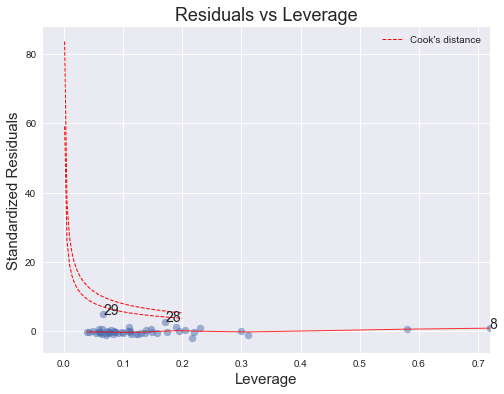

In [16]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(6)
plot_lm_4.set_figwidth(8)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

#plot_lm_4.axes[0].set_xlim(0, 0.20)
#plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');

*The point with index "8" is an influential outlier, because its leverage is high from the rest of points. Point "29" and "28" are also outliers, but they are not influencial.*

### 4) Linearity & constant variance
**a) Generate a predicted vs standardized residual plot**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


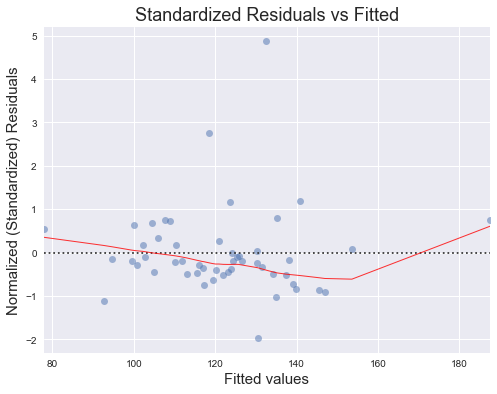

In [17]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(6)
plot_lm_1.set_figwidth(8)


plot_lm_1.axes[0] = sns.residplot(model_fitted_y, model_norm_residuals,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Standardized Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Normalized (Standardized) Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

### 5) Normality
**a) Do a Q-Q Plot to see if the residuals are normally distributed**

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


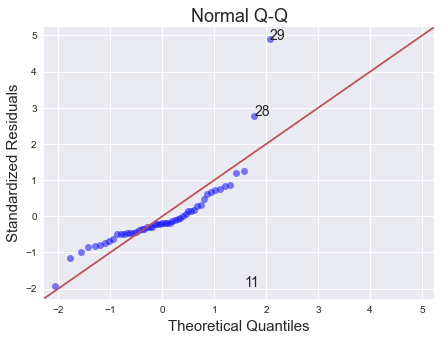

In [18]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(5)
plot_lm_2.set_figwidth(7)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

*Since the points do not follow the line well, it can be concluded that residuals are normally distributed, and the assumption of normally distributed residuals is violated.*